# Importing all Libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# importing basic library:
import numpy as np
import pandas as pd 

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
# for visualizattion:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# for ignoring warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# for splitting data and Cross-validation:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [6]:
# for preprocessing:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [7]:
# for predictive modeling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [8]:
# for auc:
from sklearn import metrics

In [9]:
# for evaluation matrix:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# for dumping model
import pickle

In [11]:
# importing dataset:
titanic=pd.read_csv(r"train.csv", index_col=0, header=0)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [12]:
titanic.shape

(891, 11)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
titanic.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Barah, Mr. Hanna Assi",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic=titanic[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

<AxesSubplot:ylabel='PassengerId'>

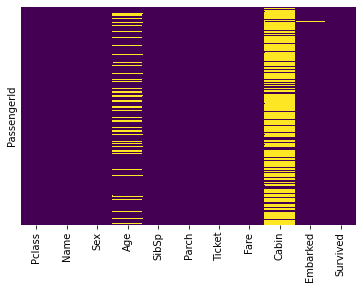

In [17]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [18]:
titanic.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [19]:
titanic.drop(["Name"], axis=1, inplace=True)

In [20]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

In [21]:
titanic.drop(["Cabin"], axis=1, inplace=True)

In [22]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

<AxesSubplot:ylabel='PassengerId'>

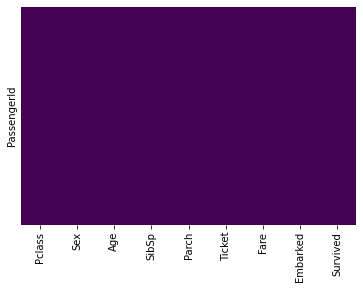

In [23]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Data Visualization

In [24]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
2,1,female,38.0,1,0,PC 17599,71.2833,C,1
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,female,35.0,1,0,113803,53.1000,S,1
5,3,male,35.0,0,0,373450,8.0500,S,0


In [25]:
#storing categorical value in 'df1_categorical' and numerical in 'df1_numerical'
cat=[]
num=[]

for x in titanic:
    if titanic[x].dtype=='object':
        cat.append(x)
    elif titanic[x].dtype=='int64' or titanic[x].dtype=='float64':
        num.append(x)

In [26]:
cat

['Sex', 'Ticket', 'Embarked']

In [27]:
num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

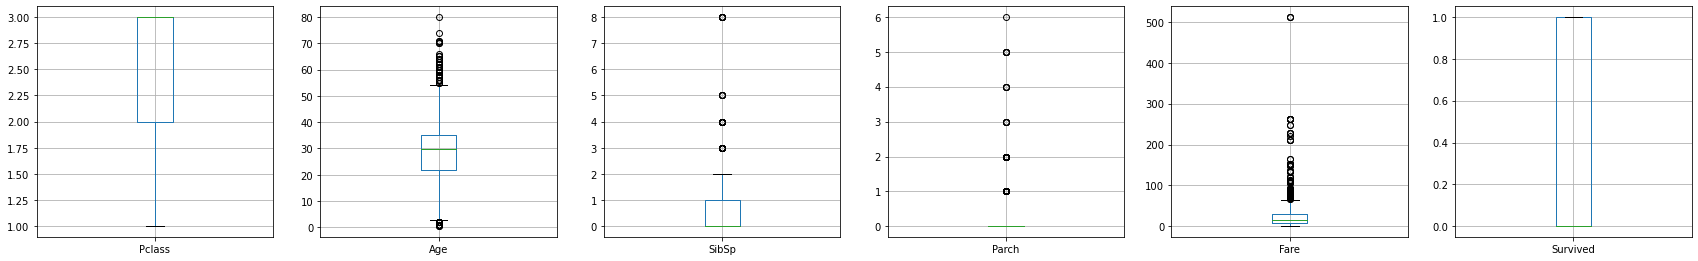

In [28]:
j=1
plt.figure(figsize=(50,50))
for i in num:
    plt.subplot(10,10,j)
    titanic.boxplot(column=i)
    j=j+1

In [29]:
df=titanic.copy()

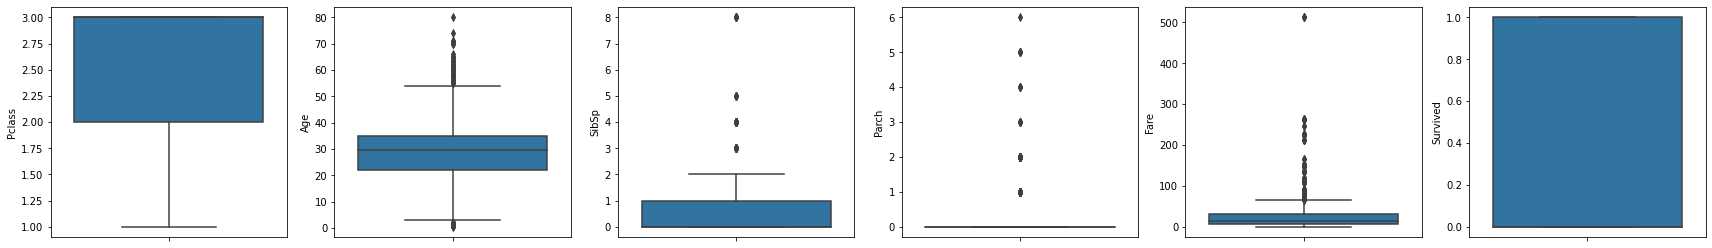

In [30]:
j=1
plt.figure(figsize=(50, 50))
for i in num:
    plt.subplot(10, 10, j)
    sns.boxplot(y=df[i])
    j=j+1

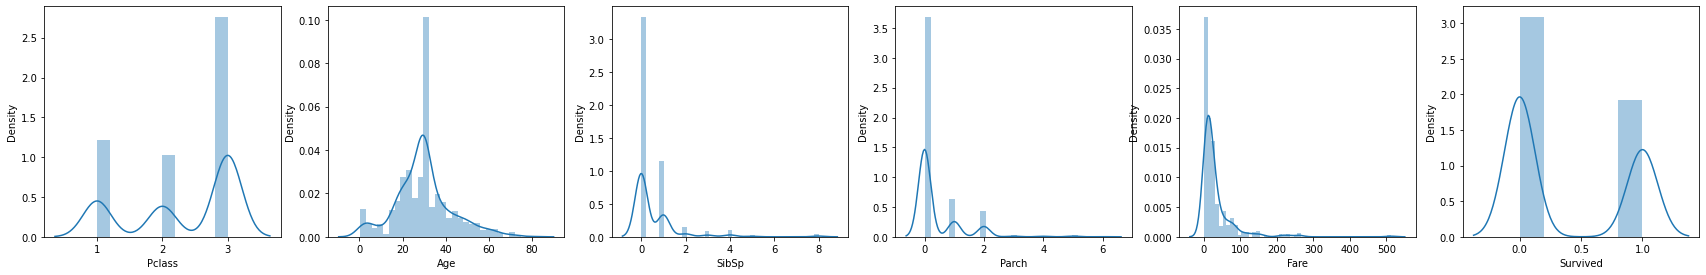

In [31]:
j=1
plt.figure(figsize=(50, 50))
for i in num:
    plt.subplot(10, 10, j)
    sns.distplot(df[i])
    j=j+1

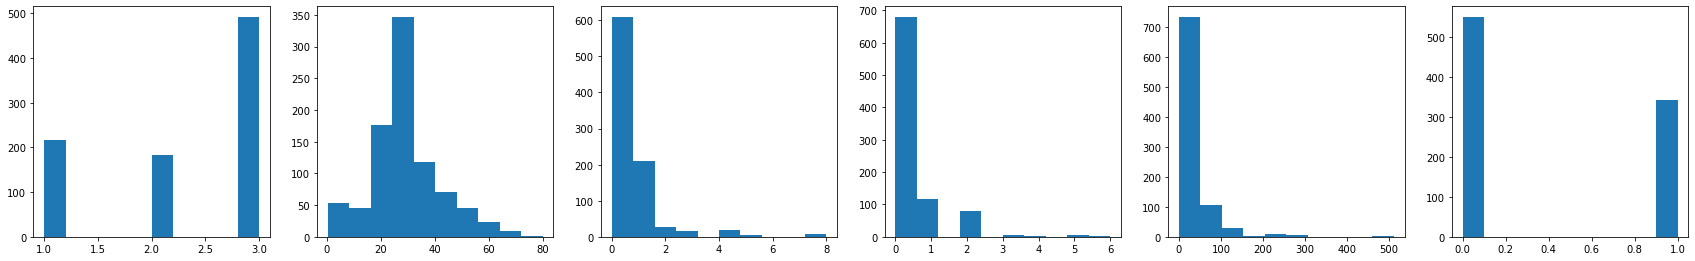

In [32]:
j=1
plt.figure(figsize=(50, 50))
for i in num:
    plt.subplot(10, 10, j)
    plt.hist(data=df, x=i)
    j=j+1

<AxesSubplot:xlabel='Survived', ylabel='count'>

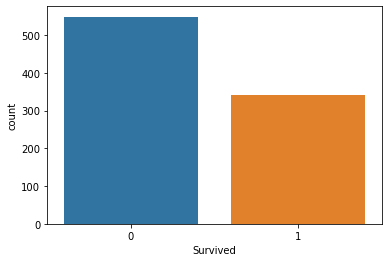

In [33]:
sns.countplot(data= df, x="Survived")

Text(0.5, 1.0, 'Pclass w.r.t survived')

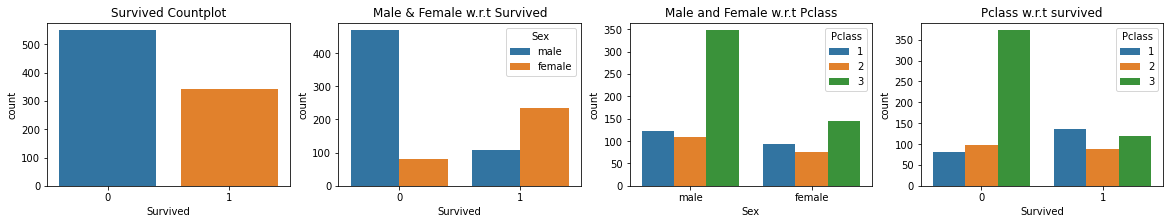

In [34]:
plt.figure(figsize=(20, 3))
plt.subplot(141) #(row number,sum of column numbers,position)
sns.countplot(data= df, x="Survived")
plt.title("Survived Countplot")

plt.subplot(142) #(row number,sum of column numbers,position)
sns.countplot(data= df, x="Survived", hue="Sex")
plt.title("Male & Female w.r.t Survived")

plt.subplot(143)
sns.countplot(data= df, x="Sex", hue="Pclass")
plt.title("Male and Female w.r.t Pclass")

plt.subplot(144)
sns.countplot(data= df, x="Survived", hue="Pclass")
plt.title("Pclass w.r.t survived")

In [35]:
pd.crosstab(df["Pclass"], df["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [36]:
pd.crosstab(df["Pclass"], df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [37]:
df0=df[df["Survived"]==0]
df0.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1,3,male,22.000000,1,0,A/5 21171,7.2500,S,0
5,3,male,35.000000,0,0,373450,8.0500,S,0
6,3,male,29.699118,0,0,330877,8.4583,Q,0
7,1,male,54.000000,0,0,17463,51.8625,S,0
8,3,male,2.000000,3,1,349909,21.0750,S,0


In [38]:
df0["Survived"]=df0["Survived"].replace({0:1})
df0.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1,3,male,22.000000,1,0,A/5 21171,7.2500,S,1
5,3,male,35.000000,0,0,373450,8.0500,S,1
6,3,male,29.699118,0,0,330877,8.4583,Q,1
7,1,male,54.000000,0,0,17463,51.8625,S,1
8,3,male,2.000000,3,1,349909,21.0750,S,1


In [39]:
pd.pivot_table(df0,index=["Sex"],values=["Survived"],margins=True,margins_name="Total",aggfunc={"Survived":sum})

,Survived
Sex,
female,81
male,468
Total,549


In [40]:
pd.pivot_table(df0,index=["Pclass","Sex"],values=["Survived"],margins=True,margins_name="Total",aggfunc={"Survived":sum})

Survived
Pclass Sex             
1      female         3
       male          77
2      female         6
       male          91
3      female        72
       male         300
Total               549

In [41]:
pd.pivot_table(df0,index=["Embarked"],values=["Survived"],margins=True,margins_name="Total",aggfunc={"Survived":sum})

,Survived
Embarked,
C,75
Q,47
S,427
Total,549


In [42]:
pd.pivot_table(df,index=["Embarked"],values=["Survived"],margins=True,margins_name="Total",aggfunc={"Survived":sum})

,Survived
Embarked,
C,93
Q,30
S,219
Total,342


In [43]:
pd.pivot_table(df,index=["Pclass","Embarked"],values=["Fare"],margins=True,margins_name="Total",aggfunc={"Fare":np.mean})

Fare
Pclass Embarked            
1      C         104.718529
       Q          90.000000
       S          70.514244
2      C          25.358335
       Q          12.350000
       S          20.327439
3      C          11.214083
       Q          11.183393
       S          14.644083
Total             32.204208

## Pre-processing

In [44]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
2,1,female,38.0,1,0,PC 17599,71.2833,C,1
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,female,35.0,1,0,113803,53.1000,S,1
5,3,male,35.0,0,0,373450,8.0500,S,0


In [45]:
df.drop(["Ticket"], axis=1, inplace=True)

In [46]:
col=["Sex", "Embarked"]
le=LabelEncoder()

for x in col:
    df[x]=le.fit_transform(df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature", x)
    print("mapping", le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [47]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,0
2,1,0,38.0,1,0,71.2833,0,1
3,3,0,26.0,0,0,7.9250,2,1
4,1,0,35.0,1,0,53.1000,2,1
5,3,1,35.0,0,0,8.0500,2,0


In [48]:
df.shape

(891, 8)

# Splitting  Data

## Creating X and Y 

In [49]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [50]:
X.shape, Y.shape

((891, 7), (891,))

In [51]:
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

## Scaling Data

In [53]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Machine Learning Model

## Logistic regression

In [54]:
log= LogisticRegression()
log.fit(X_train, Y_train)
LR= log.predict(X_test)

In [55]:
print(list(zip(Y_test,LR)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0),

In [56]:
print("Accuracy score:\n", accuracy_score(Y_test, LR),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, LR),"\n")
print("Classification report\n", classification_report(Y_test, LR),"\n")

Accuracy score:
 0.8212290502793296 

Confusion matix:
 [[102  15]
 [ 17  45]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179
 



In [57]:
# store the predicted probabilities
LR_prob= log.predict_proba(X_test)
print(LR_prob)

[[0.91187696 0.08812304]
 [0.86337811 0.13662189]
 [0.88490515 0.11509485]
 [0.07773339 0.92226661]
 [0.11309789 0.88690211]
 [0.85930674 0.14069326]
 [0.88155016 0.11844984]
 [0.8478028  0.1521972 ]
 [0.90353028 0.09646972]
 [0.87081594 0.12918406]
 [0.73044995 0.26955005]
 [0.08054129 0.91945871]
 [0.31564894 0.68435106]
 [0.53250615 0.46749385]
 [0.75620982 0.24379018]
 [0.76314612 0.23685388]
 [0.97254334 0.02745666]
 [0.94412669 0.05587331]
 [0.43166603 0.56833397]
 [0.81988617 0.18011383]
 [0.92977016 0.07022984]
 [0.67085464 0.32914536]
 [0.28053338 0.71946662]
 [0.91986702 0.08013298]
 [0.70768591 0.29231409]
 [0.86290611 0.13709389]
 [0.86323054 0.13676946]
 [0.36964561 0.63035439]
 [0.86807322 0.13192678]
 [0.06977491 0.93022509]
 [0.1176891  0.8823109 ]
 [0.76314612 0.23685388]
 [0.2760639  0.7239361 ]
 [0.96333043 0.03666957]
 [0.20408852 0.79591148]
 [0.89674168 0.10325832]
 [0.32239441 0.67760559]
 [0.73129609 0.26870391]
 [0.86273544 0.13726456]
 [0.90352146 0.09647854]


In [58]:
fpr, tpr, z= metrics.roc_curve(Y_test, LR_prob[:,1])
auc= metrics.auc(fpr,tpr)
print(auc)

0.8610421836228288


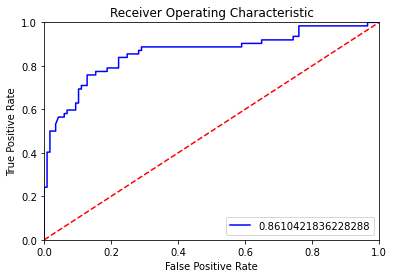

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Stochastic Gradient Decent

In [60]:
sgd= SGDClassifier(loss= "log", random_state= 10, alpha= 0.01, max_iter= 1000, shuffle= True, early_stopping= True, n_iter_no_change= 3)
sgd.fit(X_train, Y_train)
SGD= sgd.predict(X_test)

In [61]:
print(list(zip(Y_test,SGD)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0),

In [62]:
print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.8212290502793296 

Confusion matix:
 [[102  15]
 [ 17  45]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       117
           1       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179
 



## Tune Stochastic Gradient Decent

### GridSearchCV for model tunning

In [63]:
sgd_tune =SGDClassifier(random_state=10)

parameter_space = { "loss":["log"], 
                   "alpha": [0.01, 0.001,0.0001], 
                   "max_iter": [1000, 1100, 1200, ], 
                   "n_iter_no_change":[3, 4 , 5 , 6 , 8 , 10] 
                  }

clf = GridSearchCV(sgd_tune, parameter_space, n_jobs=-1, cv=5)

In [64]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=10), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.0001], 'loss': ['log'],
                         'max_iter': [1000, 1100, 1200],
                         'n_iter_no_change': [3, 4, 5, 6, 8, 10]})

In [65]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 3}


In [66]:
sgd_tune= SGDClassifier(loss="log", alpha=0.001, max_iter=1000, random_state= 10, shuffle= True, n_iter_no_change=6)
sgd_tune.fit(X_train, Y_train)
SGD_tune= sgd_tune.predict(X_test)

In [67]:
print("Accuracy score:\n", accuracy_score(Y_test, SGD_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD_tune),"\n")
print("Classification report\n", classification_report(Y_test, SGD_tune),"\n")

Accuracy score:
 0.8268156424581006 

Confusion matix:
 [[103  14]
 [ 17  45]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179
 



## K-Nearest Neighbors

In [68]:
knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')
knn.fit(X_train,Y_train)
KNN=knn.predict(X_test)

In [69]:
print(list(zip(Y_test,KNN)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (1, 0),

In [70]:
print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.8491620111731844 

Confusion matix:
 [[108   9]
 [ 18  44]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       117
           1       0.83      0.71      0.77        62

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179
 



In [71]:
int(np.sqrt(len(X_train)))

26

## Tune K-Nearest Neighbors

In [72]:
my_dict={}

for K in range(1,50):
    knn_tune = KNeighborsClassifier(n_neighbors=K, metric="minkowski")
    knn_tune.fit(X_train, Y_train) 
    KNN_tune = knn_tune.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test, KNN_tune), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test, KNN_tune)

Accuracy is  0.7150837988826816 for K-Value: 1
Accuracy is  0.8100558659217877 for K-Value: 2
Accuracy is  0.8268156424581006 for K-Value: 3
Accuracy is  0.8268156424581006 for K-Value: 4
Accuracy is  0.8156424581005587 for K-Value: 5
Accuracy is  0.8379888268156425 for K-Value: 6
Accuracy is  0.8435754189944135 for K-Value: 7
Accuracy is  0.8379888268156425 for K-Value: 8
Accuracy is  0.8379888268156425 for K-Value: 9
Accuracy is  0.8435754189944135 for K-Value: 10
Accuracy is  0.8547486033519553 for K-Value: 11
Accuracy is  0.8379888268156425 for K-Value: 12
Accuracy is  0.8435754189944135 for K-Value: 13
Accuracy is  0.8435754189944135 for K-Value: 14
Accuracy is  0.8379888268156425 for K-Value: 15
Accuracy is  0.8379888268156425 for K-Value: 16
Accuracy is  0.8324022346368715 for K-Value: 17
Accuracy is  0.8379888268156425 for K-Value: 18
Accuracy is  0.8268156424581006 for K-Value: 19
Accuracy is  0.8491620111731844 for K-Value: 20
Accuracy is  0.8379888268156425 for K-Value: 21
A

In [73]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

11 : 0.8547486033519553


In [169]:
knn_tune=KNeighborsClassifier(n_neighbors=11,metric='minkowski')
knn_tune.fit(X_train,Y_train)
KNN_tune=knn_tune.predict(X_test)

In [170]:
print("Accuracy score:\n", accuracy_score(Y_test, KNN_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN_tune),"\n")
print("Classification report\n", classification_report(Y_test, KNN_tune),"\n")

Accuracy score:
 0.8547486033519553 

Confusion matix:
 [[105  12]
 [ 14  48]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       117
           1       0.80      0.77      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179
 



In [76]:
# store the predicted probabilities
KNN_prob= knn_tune.predict_proba(X_test)
print(KNN_prob)

[[1.         0.        ]
 [0.90909091 0.09090909]
 [0.72727273 0.27272727]
 [0.         1.        ]
 [0.         1.        ]
 [0.90909091 0.09090909]
 [1.         0.        ]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]
 [1.         0.        ]
 [1.         0.        ]
 [0.09090909 0.90909091]
 [0.27272727 0.72727273]
 [0.36363636 0.63636364]
 [0.81818182 0.18181818]
 [0.81818182 0.18181818]
 [0.90909091 0.09090909]
 [1.         0.        ]
 [0.54545455 0.45454545]
 [0.90909091 0.09090909]
 [0.81818182 0.18181818]
 [0.72727273 0.27272727]
 [0.27272727 0.72727273]
 [0.81818182 0.18181818]
 [0.54545455 0.45454545]
 [1.         0.        ]
 [1.         0.        ]
 [0.27272727 0.72727273]
 [0.81818182 0.18181818]
 [0.         1.        ]
 [0.         1.        ]
 [0.81818182 0.18181818]
 [0.09090909 0.90909091]
 [0.90909091 0.09090909]
 [0.27272727 0.72727273]
 [0.90909091 0.09090909]
 [0.36363636 0.63636364]
 [0.54545455 0.45454545]
 [0.90909091 0.09090909]
 [0.90909091 0.09090909]


In [77]:
fpr, tpr, z= metrics.roc_curve(Y_test, KNN_prob[:,1])
auc= metrics.auc(fpr,tpr)
print(auc)

0.8813068651778329


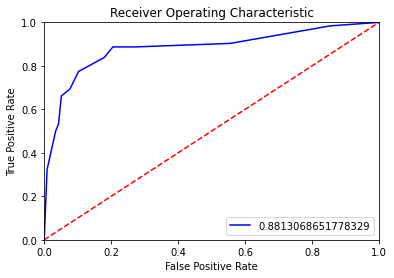

In [78]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Support Vector Machine

In [79]:
svm= SVC(kernel='rbf', C=1, gamma=0.01)
svm.fit(X_train, Y_train)
SVM= svm.predict(X_test)

In [80]:
print(list(zip(Y_test,SVM)))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1),

In [81]:
print("Accuracy score:\n", accuracy_score(Y_test, SVM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM),"\n")
print("Classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score:
 0.8212290502793296 

Confusion matix:
 [[104  13]
 [ 19  43]] 

Classification report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179
 



## Tune Support Vector Machine

In [82]:
my_dict={}

for cp in range(1,600):
    svm_tune = SVC(kernel='rbf', C=cp, gamma=0.01)
    svm_tune.fit(X_train, Y_train) 
    SVM_tune = svm_tune.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test, SVM_tune), "for C-Value:",cp)
    my_dict[cp]=accuracy_score(Y_test, SVM_tune)

Accuracy is  0.8212290502793296 for C-Value: 1
Accuracy is  0.8156424581005587 for C-Value: 2
Accuracy is  0.8156424581005587 for C-Value: 3
Accuracy is  0.8156424581005587 for C-Value: 4
Accuracy is  0.8156424581005587 for C-Value: 5
Accuracy is  0.8100558659217877 for C-Value: 6
Accuracy is  0.8100558659217877 for C-Value: 7
Accuracy is  0.8100558659217877 for C-Value: 8
Accuracy is  0.8100558659217877 for C-Value: 9
Accuracy is  0.8100558659217877 for C-Value: 10
Accuracy is  0.8100558659217877 for C-Value: 11
Accuracy is  0.8100558659217877 for C-Value: 12
Accuracy is  0.8156424581005587 for C-Value: 13
Accuracy is  0.8156424581005587 for C-Value: 14
Accuracy is  0.8156424581005587 for C-Value: 15
Accuracy is  0.8156424581005587 for C-Value: 16
Accuracy is  0.8156424581005587 for C-Value: 17
Accuracy is  0.8156424581005587 for C-Value: 18
Accuracy is  0.8156424581005587 for C-Value: 19
Accuracy is  0.8212290502793296 for C-Value: 20
Accuracy is  0.8156424581005587 for C-Value: 21
A

Accuracy is  0.8491620111731844 for C-Value: 171
Accuracy is  0.8491620111731844 for C-Value: 172
Accuracy is  0.8491620111731844 for C-Value: 173
Accuracy is  0.8491620111731844 for C-Value: 174
Accuracy is  0.8491620111731844 for C-Value: 175
Accuracy is  0.8491620111731844 for C-Value: 176
Accuracy is  0.8491620111731844 for C-Value: 177
Accuracy is  0.8491620111731844 for C-Value: 178
Accuracy is  0.8491620111731844 for C-Value: 179
Accuracy is  0.8491620111731844 for C-Value: 180
Accuracy is  0.8491620111731844 for C-Value: 181
Accuracy is  0.8491620111731844 for C-Value: 182
Accuracy is  0.8491620111731844 for C-Value: 183
Accuracy is  0.8491620111731844 for C-Value: 184
Accuracy is  0.8491620111731844 for C-Value: 185
Accuracy is  0.8491620111731844 for C-Value: 186
Accuracy is  0.8491620111731844 for C-Value: 187
Accuracy is  0.8491620111731844 for C-Value: 188
Accuracy is  0.8491620111731844 for C-Value: 189
Accuracy is  0.8491620111731844 for C-Value: 190
Accuracy is  0.84916

Accuracy is  0.8547486033519553 for C-Value: 340
Accuracy is  0.8547486033519553 for C-Value: 341
Accuracy is  0.8547486033519553 for C-Value: 342
Accuracy is  0.8547486033519553 for C-Value: 343
Accuracy is  0.8547486033519553 for C-Value: 344
Accuracy is  0.8547486033519553 for C-Value: 345
Accuracy is  0.8547486033519553 for C-Value: 346
Accuracy is  0.8547486033519553 for C-Value: 347
Accuracy is  0.8547486033519553 for C-Value: 348
Accuracy is  0.8547486033519553 for C-Value: 349
Accuracy is  0.8547486033519553 for C-Value: 350
Accuracy is  0.8547486033519553 for C-Value: 351
Accuracy is  0.8547486033519553 for C-Value: 352
Accuracy is  0.8547486033519553 for C-Value: 353
Accuracy is  0.8547486033519553 for C-Value: 354
Accuracy is  0.8547486033519553 for C-Value: 355
Accuracy is  0.8547486033519553 for C-Value: 356
Accuracy is  0.8547486033519553 for C-Value: 357
Accuracy is  0.8547486033519553 for C-Value: 358
Accuracy is  0.8547486033519553 for C-Value: 359
Accuracy is  0.85474

Accuracy is  0.8603351955307262 for C-Value: 509
Accuracy is  0.8603351955307262 for C-Value: 510
Accuracy is  0.8603351955307262 for C-Value: 511
Accuracy is  0.8603351955307262 for C-Value: 512
Accuracy is  0.8603351955307262 for C-Value: 513
Accuracy is  0.8603351955307262 for C-Value: 514
Accuracy is  0.8603351955307262 for C-Value: 515
Accuracy is  0.8603351955307262 for C-Value: 516
Accuracy is  0.8603351955307262 for C-Value: 517
Accuracy is  0.8603351955307262 for C-Value: 518
Accuracy is  0.8603351955307262 for C-Value: 519
Accuracy is  0.8603351955307262 for C-Value: 520
Accuracy is  0.8603351955307262 for C-Value: 521
Accuracy is  0.8603351955307262 for C-Value: 522
Accuracy is  0.8603351955307262 for C-Value: 523
Accuracy is  0.8603351955307262 for C-Value: 524
Accuracy is  0.8603351955307262 for C-Value: 525
Accuracy is  0.8603351955307262 for C-Value: 526
Accuracy is  0.8603351955307262 for C-Value: 527
Accuracy is  0.8603351955307262 for C-Value: 528
Accuracy is  0.86033

In [83]:
for cp in my_dict:
    if my_dict[cp]==max(my_dict.values()):
        print(cp,":",my_dict[cp])

415 : 0.8603351955307262
416 : 0.8603351955307262
417 : 0.8603351955307262
418 : 0.8603351955307262
419 : 0.8603351955307262
420 : 0.8603351955307262
421 : 0.8603351955307262
422 : 0.8603351955307262
423 : 0.8603351955307262
424 : 0.8603351955307262
425 : 0.8603351955307262
426 : 0.8603351955307262
427 : 0.8603351955307262
428 : 0.8603351955307262
429 : 0.8603351955307262
430 : 0.8603351955307262
431 : 0.8603351955307262
432 : 0.8603351955307262
433 : 0.8603351955307262
434 : 0.8603351955307262
435 : 0.8603351955307262
436 : 0.8603351955307262
437 : 0.8603351955307262
438 : 0.8603351955307262
439 : 0.8603351955307262
440 : 0.8603351955307262
441 : 0.8603351955307262
442 : 0.8603351955307262
443 : 0.8603351955307262
444 : 0.8603351955307262
445 : 0.8603351955307262
446 : 0.8603351955307262
447 : 0.8603351955307262
448 : 0.8603351955307262
449 : 0.8603351955307262
450 : 0.8603351955307262
451 : 0.8603351955307262
452 : 0.8603351955307262
453 : 0.8603351955307262
454 : 0.8603351955307262


In [171]:
svm_tune = SVC(kernel='rbf', C=415, gamma=0.01, random_state=10, probability=True)
svm_tune.fit(X_train, Y_train) 
SVM_tune = svm_tune.predict(X_test)

In [172]:
print("Accuracy score:\n", accuracy_score(Y_test, SVM_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM_tune),"\n")
print("Classification report\n", classification_report(Y_test, SVM_tune),"\n")

Accuracy score:
 0.8603351955307262 

Confusion matix:
 [[107  10]
 [ 15  47]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       117
           1       0.82      0.76      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179
 



In [86]:
# store the predicted probabilities
SVM_prob= svm_tune.predict_proba(X_test)
print(SVM_prob)

[[0.81574349 0.18425651]
 [0.8046477  0.1953523 ]
 [0.81321913 0.18678087]
 [0.01822225 0.98177775]
 [0.09599729 0.90400271]
 [0.8017555  0.1982445 ]
 [0.81243695 0.18756305]
 [0.81512368 0.18487632]
 [0.81558688 0.18441312]
 [0.80806057 0.19193943]
 [0.80619033 0.19380967]
 [0.0179017  0.9820983 ]
 [0.31209701 0.68790299]
 [0.79404077 0.20595923]
 [0.81363077 0.18636923]
 [0.81773114 0.18226886]
 [0.94885015 0.05114985]
 [0.85735873 0.14264127]
 [0.55082552 0.44917448]
 [0.80821062 0.19178938]
 [0.84518544 0.15481456]
 [0.82614308 0.17385692]
 [0.24815256 0.75184744]
 [0.85175795 0.14824205]
 [0.75329874 0.24670126]
 [0.80289513 0.19710487]
 [0.80409851 0.19590149]
 [0.10522147 0.89477853]
 [0.81410429 0.18589571]
 [0.0291369  0.9708631 ]
 [0.10952231 0.89047769]
 [0.81773114 0.18226886]
 [0.16380072 0.83619928]
 [0.88095692 0.11904308]
 [0.22950329 0.77049671]
 [0.81542224 0.18457776]
 [0.4052149  0.5947851 ]
 [0.8104663  0.1895337 ]
 [0.80156829 0.19843171]
 [0.81551265 0.18448735]


In [87]:
fpr, tpr, z= metrics.roc_curve(Y_test, SVM_prob[:,1])
auc= metrics.auc(fpr,tpr)
print(auc)

0.8755169561621173


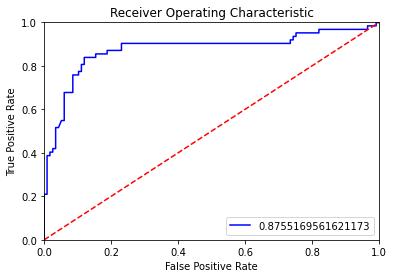

In [88]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Decision Tree

In [89]:
dt= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
dt.fit(X_train, Y_train)
DT= dt.predict(X_test)

In [90]:
print("Accuracy score:\n", accuracy_score(Y_test, DT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT),"\n")
print("Classification report\n", classification_report(Y_test, DT),"\n")

Accuracy score:
 0.776536312849162 

Confusion matix:
 [[91 26]
 [14 48]] 

Classification report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       117
           1       0.65      0.77      0.71        62

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.79      0.78      0.78       179
 



## Tune Decision Tree

In [173]:
dt_tune= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10, min_samples_leaf=5, max_depth=100, min_samples_split=4,
                                max_leaf_nodes=100)
dt_tune.fit(X_train, Y_train)
DT_tune= dt_tune.predict(X_test)

In [174]:
print("Accuracy score:\n", accuracy_score(Y_test, DT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT_tune),"\n")
print("Classification report\n", classification_report(Y_test, DT_tune),"\n")

Accuracy score:
 0.8603351955307262 

Confusion matix:
 [[105  12]
 [ 13  49]] 

Classification report
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       117
           1       0.80      0.79      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179
 



In [93]:
# store the predicted probabilities
DT_prob= dt_tune.predict_proba(X_test)
print(DT_prob)

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.4        0.6       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.875      0.125     ]
 [1.         0.        ]
 [0.25       0.75      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.71428571 0.28571429]
 [0.33333333 0.66666667]
 [0.57142857 0.42857143]
 [0.         1.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.57142857 0.42857143]
 [0.25       0.75      ]
 [0.4        0.6       ]
 [0.91666667 0.08333333]
 [0.5        0.5       ]


In [94]:
fpr, tpr, z= metrics.roc_curve(Y_test, DT_prob[:,1])
auc= metrics.auc(fpr,tpr)
print(auc)

0.8868899917287014


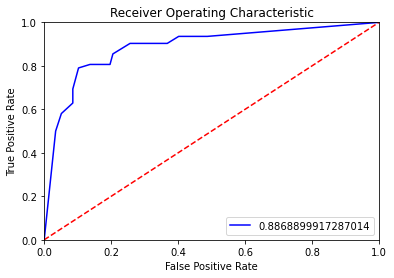

In [95]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Extra Tree

In [96]:
ext= ExtraTreesClassifier(n_estimators=100, random_state=10)
ext.fit(X_train,Y_train)
EXT= ext.predict(X_test)

In [97]:
print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.7653631284916201 

Confusion matix:
 [[95 22]
 [20 42]] 

Classification report
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       117
           1       0.66      0.68      0.67        62

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179
 



## Tune Extra Tree

In [98]:
ext_tune= ExtraTreesClassifier(n_estimators=110, random_state=10, criterion="gini", min_samples_leaf=3, max_depth=100, min_samples_split=5)
ext_tune.fit(X_train,Y_train)
EXT_tune= ext_tune.predict(X_test)

In [99]:
print("Accuracy score:\n", accuracy_score(Y_test, EXT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT_tune),"\n")
print("Classification report\n", classification_report(Y_test, EXT_tune),"\n")

Accuracy score:
 0.8379888268156425 

Confusion matix:
 [[108   9]
 [ 20  42]] 

Classification report
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       117
           1       0.82      0.68      0.74        62

    accuracy                           0.84       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.84      0.84      0.83       179
 



## Random Forest

In [100]:
rf= RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train,Y_train)
RF= rf.predict(X_test)

In [101]:
print("Accuracy score:\n", accuracy_score(Y_test, RF),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF),"\n")
print("Classification report\n", classification_report(Y_test, RF),"\n")

Accuracy score:
 0.8268156424581006 

Confusion matix:
 [[101  16]
 [ 15  47]] 

Classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179
 



## Tune Random Forest

In [175]:
rf_tune= RandomForestClassifier(n_estimators=100, random_state=10, criterion="gini", min_samples_leaf=3, max_depth=15, min_samples_split=4)
rf_tune.fit(X_train,Y_train)
RF_tune= rf_tune.predict(X_test)

In [176]:
print("Accuracy score:\n", accuracy_score(Y_test, RF_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF_tune),"\n")
print("Classification report\n", classification_report(Y_test, RF_tune),"\n")

Accuracy score:
 0.8659217877094972 

Confusion matix:
 [[106  11]
 [ 13  49]] 

Classification report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       117
           1       0.82      0.79      0.80        62

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179
 



In [152]:
# store the predicted probabilities
RF_prob= dt_tune.predict_proba(X_test)
print(RF_prob)

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.4        0.6       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.875      0.125     ]
 [1.         0.        ]
 [0.25       0.75      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.71428571 0.28571429]
 [0.33333333 0.66666667]
 [0.57142857 0.42857143]
 [0.         1.        ]
 [1.         0.        ]
 [0.5        0.5       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.8        0.2       ]
 [0.5        0.5       ]
 [0.         1.        ]
 [0.57142857 0.42857143]
 [0.25       0.75      ]
 [0.4        0.6       ]
 [0.91666667 0.08333333]
 [0.5        0.5       ]


In [153]:
fpr, tpr, z= metrics.roc_curve(Y_test, DT_prob[:,1])
auc= metrics.auc(fpr,tpr)
print(auc)

0.8868899917287014


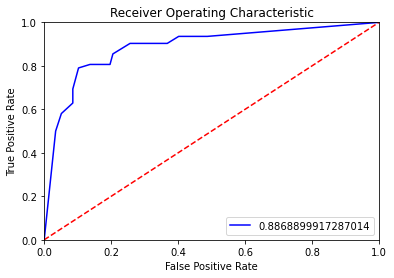

In [154]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Ada Boost

In [107]:
ab= AdaBoostClassifier(n_estimators=100, random_state=10)
ab.fit(X_train,Y_train)
AB= ab.predict(X_test)

In [108]:
print("Accuracy score:\n", accuracy_score(Y_test, AB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB),"\n")
print("Classification report\n", classification_report(Y_test, AB),"\n")

Accuracy score:
 0.8268156424581006 

Confusion matix:
 [[99 18]
 [13 49]] 

Classification report
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179
 



## Gradient Boost

In [109]:
gb= GradientBoostingClassifier(n_estimators=100, random_state=10)
gb.fit(X_train,Y_train)
GB= gb.predict(X_test)

In [110]:
print("Accuracy score:\n", accuracy_score(Y_test, GB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB),"\n")
print("Classification report\n", classification_report(Y_test, GB),"\n")

Accuracy score:
 0.8435754189944135 

Confusion matix:
 [[104  13]
 [ 15  47]] 

Classification report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179
 



## Tune Gradient Boost

In [177]:
gb_tune= GradientBoostingClassifier(n_estimators=11, random_state=10)
gb_tune.fit(X_train,Y_train)
GB_tune= gb_tune.predict(X_test)

In [178]:
print("Accuracy score:\n", accuracy_score(Y_test, GB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB_tune),"\n")
print("Classification report\n", classification_report(Y_test, GB_tune),"\n")

Accuracy score:
 0.8603351955307262 

Confusion matix:
 [[111   6]
 [ 19  43]] 

Classification report
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       117
           1       0.88      0.69      0.77        62

    accuracy                           0.86       179
   macro avg       0.87      0.82      0.84       179
weighted avg       0.86      0.86      0.86       179
 



## XGBoost

In [113]:
xgb= XGBClassifier(n_estimators=100,random_state=10, criterion="gini", min_samples_leaf=3, max_depth=15, min_samples_split=4)
xgb.fit(X_train,Y_train)
XGB=xgb.predict(X_test)

[14:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
print("Accuracy score:\n", accuracy_score(Y_test, XGB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB),"\n")
print("Classification report\n", classification_report(Y_test, XGB),"\n")

Accuracy score:
 0.8212290502793296 

Confusion matix:
 [[101  16]
 [ 16  46]] 

Classification report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179
 



## Ensemble Model

In [115]:
estimators = []

model1 = KNeighborsClassifier(n_neighbors=11,metric='minkowski')
estimators.append(("knn", model1))

model2 = SVC(kernel='rbf', C=415, gamma=0.01, random_state=10, probability=True)
estimators.append(("svm", model2))

model3 = DecisionTreeClassifier(criterion="gini",splitter="best",random_state=10,min_samples_leaf=5,max_depth=100,min_samples_split=4,max_leaf_nodes=100)
estimators.append(("dt", model3))

model4 = RandomForestClassifier(n_estimators=100, random_state=10, criterion="gini", min_samples_leaf=3, max_depth=15, min_samples_split=4)
estimators.append(("rf", model4))

model5 = GradientBoostingClassifier(n_estimators=11, random_state=10)
estimators.append(("gb", model5))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)
EM=ensemble.predict(X_test)

In [116]:
print("Accuracy score:\n", accuracy_score(Y_test, EM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EM),"\n")
print("Classification report\n", classification_report(Y_test, EM),"\n")

Accuracy score:
 0.8770949720670391 

Confusion matix:
 [[109   8]
 [ 14  48]] 

Classification report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       117
           1       0.86      0.77      0.81        62

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.88       179
 



## K-Fold Cross Validation

In [126]:
# model=KNeighborsClassifier(n_neighbors=11,metric='minkowski') #0.7989952718676124
# model=SVC(kernel='rbf', C=415, gamma=0.01, random_state=10, probability=True) #0.8103132387706855
# model=DecisionTreeClassifier(criterion="gini",splitter="best",random_state=10,min_samples_leaf=5,max_depth=100,min_samples_split=4,max_leaf_nodes=100) #0.796306146572104
model=RandomForestClassifier(n_estimators=100, random_state=10, criterion="gini", min_samples_leaf=3, max_depth=15, min_samples_split=4) #0.8201241134751772
# model=GradientBoostingClassifier(n_estimators=11, random_state=10) #0.8061170212765957

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=15)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model,X=X_train, y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.83333333 0.875      0.77083333 0.85416667 0.875      0.79166667
 0.8125     0.76595745 0.70212766 0.76595745 0.80851064 0.93617021
 0.78723404 0.80851064 0.91489362]
0.8201241134751772


# All operation on Testing Dataset

# Importing test data

In [ ]:
test=pd.read_csv(r'test.csv',index_col=0,header=0)
test.head()

In [129]:
test.shape

(418, 10)

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<AxesSubplot:ylabel='PassengerId'>

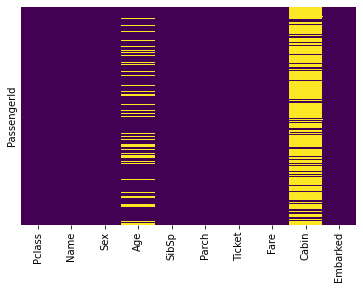

In [131]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [132]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [134]:
test.drop(["Name"], axis=1, inplace=True)

In [139]:
test["Age"].fillna(df["Age"].mean(), inplace=True)

In [142]:
test.drop(["Ticket"], axis=1, inplace=True)

In [136]:
test["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [137]:
test.drop(["Cabin"], axis=1, inplace=True)

<AxesSubplot:ylabel='PassengerId'>

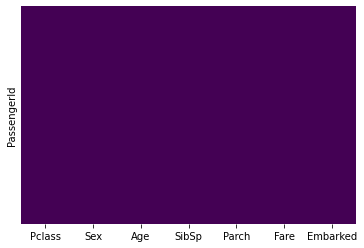

In [143]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [144]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Pre-processing

In [145]:
# For preprocessing the data
le=LabelEncoder()

col=['Sex','Embarked']
for x in col:
    test[x]=le.fit_transform(test[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [146]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


# Scaling Data and Implementing model

In [147]:
X_test_new  = test.iloc[:,:]

In [148]:
X_test_new = scaler.transform(X_test_new)

In [149]:
X_test_new

array([[ 8.25233303e-01,  7.53844771e-01,  3.71863232e-01, ...,
        -4.77849481e-01, -4.84934969e-01, -7.16127165e-01],
       [ 8.25233303e-01, -1.32653305e+00,  1.33510795e+00, ...,
        -4.77849481e-01, -5.01052942e-01,  5.68211731e-01],
       [-3.76333388e-01,  7.53844771e-01,  2.49100160e+00, ...,
        -4.77849481e-01, -4.48813370e-01, -7.16127165e-01],
       ...,
       [ 8.25233303e-01,  7.53844771e-01,  6.80101540e-01, ...,
        -4.77849481e-01, -4.96193447e-01,  5.68211731e-01],
       [ 8.25233303e-01,  7.53844771e-01,  1.90926816e-03, ...,
        -4.77849481e-01, -4.80643063e-01,  5.68211731e-01],
       [ 8.25233303e-01,  7.53844771e-01,  1.90926816e-03, ...,
         7.11761814e-01, -2.02518610e-01, -2.00046606e+00]])

In [155]:
Y_pred_new=rf_tune.predict(X_test_new)

In [156]:
print(Y_pred_new)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [157]:
Y_pred_new.shape

(418,)

# Importing submission file

In [158]:
df=pd.read_csv(r'gender_submission.csv',header=0)

In [160]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [159]:
df.shape

(418, 2)

In [161]:
df['Survived']=Y_pred_new

In [162]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [163]:
df.to_csv(r'gender_submission.csv', index=False,header=True)

# Dumping model

In [179]:
pickle.dump(knn_tune,open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\knn_tune.pkl','wb'))
pickle.dump(svm_tune,open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\svc_tune.pkl','wb'))
pickle.dump(dt_tune,open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\dt_tune.pkl','wb'))
pickle.dump(rf_tune,open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\rt_tune.pkl','wb'))
pickle.dump(gb_tune,open(r'C:\Users\vishal\Web Deployment\Titanic Machine Learning from Disaster\models\gb_tune.pkl','wb'))